In [1]:
# physics 411 final project code:

# import libraries

import numpy as np
import random as rn
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import scipy as sp
from scipy.stats import norm
import datetime 
import matplotlib.dates as mdates
import random
import matplotlib.ticker as plticker
from scipy import signal
from scipy.stats.distributions import chi2
import scipy.integrate as integrate
from scipy.interpolate import interp1d
from numpy.polynomial import Polynomial

In [2]:
# this is the coast line data set:

coast_line = np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/VI_Coast_updated.dat").T
                        
                        
                        

In [4]:
# minute data below:

craigflower_mtp = np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/UVIcWeatherdata_Minute_2022/Craigflower_Tp.dat")
craigflower_mtp = craigflower_mtp[2:,].T

cortes_mtp = np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/UVIcWeatherdata_Minute_2022/Cortes_Tp.dat")
cortes_mtp = cortes_mtp[2:,].T

cumberland_mtp = np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/UVIcWeatherdata_Minute_2022/Cumberland_Tp.dat")
cumberland_mtp = cumberland_mtp[2:,].T

monterey_mtp = np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/UVIcWeatherdata_Minute_2022/Monterey_Tp.dat")
monterey_mtp = monterey_mtp[2:,].T

shawniganlake_mtp = np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/UVIcWeatherdata_Minute_2022/ShawniganLake_Tp.dat")
shawniganlake_mtp = shawniganlake_mtp[2:,].T

uvicsci_mtp = np.loadtxt("/Users/benrasmussen/Documents/Phys 411/Data/UVIcWeatherdata_Minute_2022/UvicSci_Tp.dat")
uvicsci_mtp = uvicsci_mtp[2:,].T



In [62]:
path = '/Users/benrasmussen/Documents/Phys 411/Assignments/Final Project/'

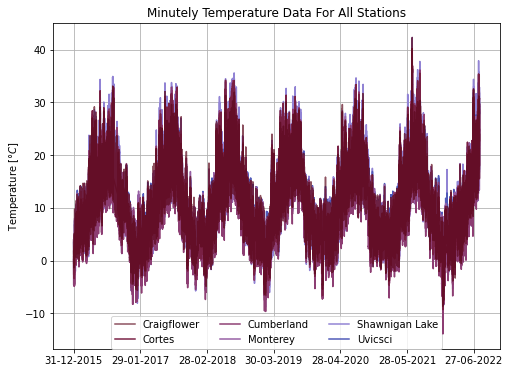

In [85]:
# time vector 

time_plot = np.linspace(736330.00000, 738733.99931, 3461760) -719165-365

colours2 = ['#5c071b', '#792044', '#8d3e73', '#965fa4', '#9183d4', '#4f59b8']

labels2=['Craigflower','Cortes','Cumberland','Monterey',
                'Shawnigan Lake','Uvicsci']


ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(8)
ff.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=395))

ax1.plot(time_plot, craigflower_mtp[0], color=colours2[0],label=labels2[0],zorder=10, alpha=0.7)
ax1.plot(time_plot, cortes_mtp[0], color=colours2[1], label=labels2[1],zorder=8)
ax1.plot(time_plot, cumberland_mtp[0], color=colours2[2], label=labels2[2],zorder=6)
ax1.plot(time_plot, monterey_mtp[0], color=colours2[3], label=labels2[3],zorder=4)
ax1.plot(time_plot, shawniganlake_mtp[0], color=colours2[4], label=labels2[4],zorder=2)
ax1.plot(time_plot, uvicsci_mtp[0], color=colours2[5], label=labels2[5])

ax1.legend(loc='lower center', borderaxespad=0, ncol=3)

ax1.set_title("Minutely Temperature Data For All Stations")
ax1.set_ylabel(r"Temperature [$\degree C$]" )
ax1.grid(True)

plt.savefig(path + 'min_temp_time_series.png', format='png', dpi=300)

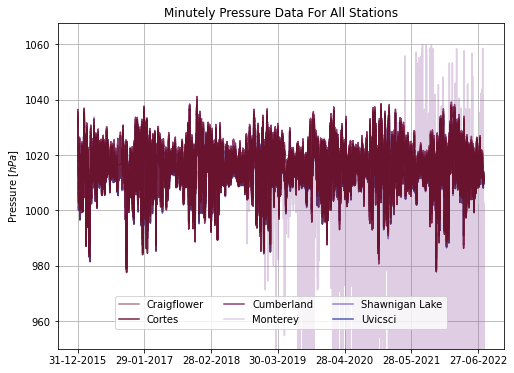

In [86]:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(8)
ff.set_figheight(6)

# plots the hourly data:
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=395))

ax1.plot(time_plot, craigflower_mtp[1], color=colours2[0],label=labels2[0],zorder=10, alpha=0.5)
ax1.plot(time_plot, cortes_mtp[1], color=colours2[1], label=labels2[1],zorder=8)
ax1.plot(time_plot, cumberland_mtp[1], color=colours2[2], label=labels2[2],zorder=6)
ax1.plot(time_plot, monterey_mtp[1], color=colours2[3], label=labels2[3],zorder=4, alpha=0.3)
ax1.plot(time_plot, shawniganlake_mtp[1], color=colours2[4], label=labels2[4],zorder=2)
ax1.plot(time_plot, uvicsci_mtp[1], color=colours2[5], label=labels2[5])

ax1.legend(loc='lower center', borderaxespad=2, ncol=3)

ax1.set_title("Minutely Pressure Data For All Stations")
ax1.set_ylabel(r"Pressure [$hPa$]" )
ax1.grid(True)
ax1.set_ylim(950)

plt.savefig(path + 'min_pres_time_series.png', format='png', dpi=300)

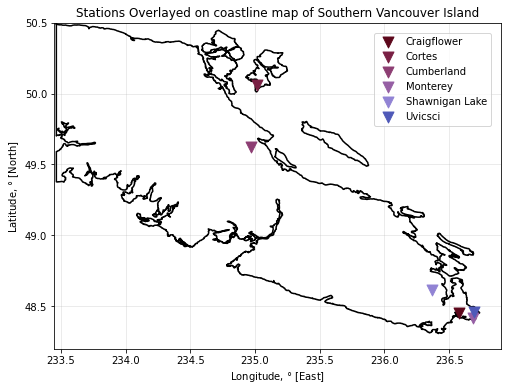

In [87]:
min_coords = [[236.579, 48.4537], [235.017, 50.0599], [234.967, 49.6212], 
              [236.686, 48.4182], [236.369, 48.6154], [236.691, 48.4623]]

            
              
              
width=8
height=6
ff, (ax1) = plt.subplots(1,1)
ff.set_figwidth(width)
ff.set_figheight(height)

size = 120
m='v'
ax1.scatter(min_coords[0][0], min_coords[0][1],s=size, marker=m,label=labels2[0],color=colours2[0],zorder=10)
ax1.scatter(min_coords[1][0], min_coords[1][1],s=size, marker=m, label=labels2[1],color=colours2[1],zorder=10)
ax1.scatter(min_coords[2][0], min_coords[2][1],s=size, marker=m,label=labels2[2],color=colours2[2],zorder=10)
ax1.scatter(min_coords[3][0], min_coords[3][1],s=size, marker=m, label=labels2[3],color=colours2[3],zorder=10)
ax1.scatter(min_coords[4][0], min_coords[4][1],s=size, marker=m, label=labels2[4],color=colours2[4],zorder=10)
ax1.scatter(min_coords[5][0], min_coords[5][1],s=size, marker=m, label=labels2[5],color=colours2[5],zorder=10)



ax1.plot(coast_line[0], coast_line[1], 'k')    
ax1.set_title(r"Stations Overlayed on coastline map of Southern Vancouver Island")
ax1.set_xlabel(r"Longitude, $\degree$ [East]")
ax1.set_ylabel(r"Latitude, $\degree$ [North]")
ax1.legend(loc='upper right', borderaxespad=1)
ax1.grid(alpha=0.3)
ax1.set_xlim(233.45)
ax1.set_ylim(48.2,50.5)
#ax1.set_aspect(1)   #np.cos(np.mean(np.array(min_coords).T[1])))

plt.savefig(path + 'min_station_location.png', format='png', dpi=300)

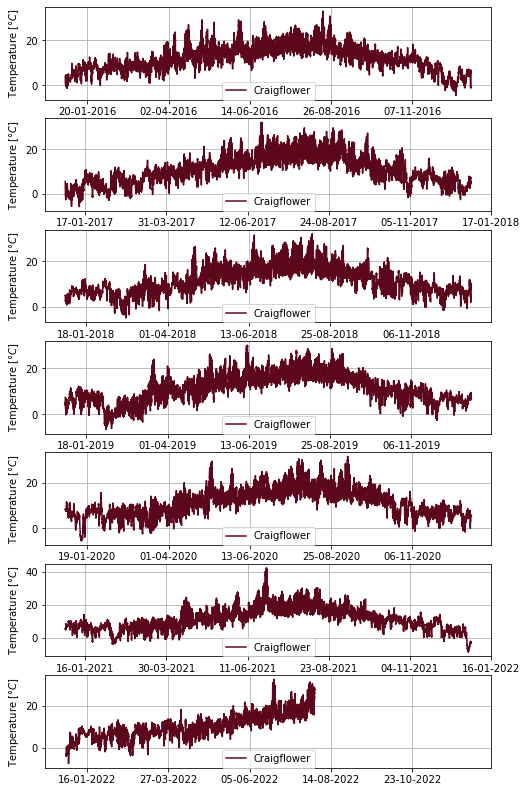

In [41]:
# year length:

len_year = 24*365*60    #int(len(time_plot)/6)


ff, (ax1) = plt.subplots(7, 1)
ff.set_figwidth(8)
ff.set_figheight(14)

# plots the hourly data:
ax1[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1[0].xaxis.set_major_locator(mdates.DayLocator(interval=73))
ax1[0].plot(time_plot[:len_year], craigflower_mtp[0][:len_year], color=colours2[0],label=labels2[0],zorder=10)
ax1[0].legend(loc='lower center', borderaxespad=0, ncol=3)
#ax1[0].set_title("Minutely Temperature Data For All Stations")
ax1[0].set_ylabel(r"Temperature [$\degree C$]" )
ax1[0].grid(True)


ax1[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1[1].xaxis.set_major_locator(mdates.DayLocator(interval=73))
ax1[1].plot(time_plot[len_year:2*len_year], craigflower_mtp[0][len_year:2*len_year], color=colours2[0],label=labels2[0],zorder=10)
ax1[1].legend(loc='lower center', borderaxespad=0, ncol=3)
#ax1[1].set_title("Minutely Temperature Data For All Stations")
ax1[1].set_ylabel(r"Temperature [$\degree C$]" )
ax1[1].grid(True)


ax1[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1[2].xaxis.set_major_locator(mdates.DayLocator(interval=73))
ax1[2].plot(time_plot[2*len_year:3*len_year], craigflower_mtp[0][2*len_year:3*len_year], color=colours2[0],label=labels2[0],zorder=10)
ax1[2].legend(loc='lower center', borderaxespad=0, ncol=3)
#ax1[1].set_title("Minutely Temperature Data For All Stations")
ax1[2].set_ylabel(r"Temperature [$\degree C$]" )
ax1[2].grid(True)

ax1[3].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1[3].xaxis.set_major_locator(mdates.DayLocator(interval=73))
ax1[3].plot(time_plot[3*len_year:4*len_year], craigflower_mtp[0][3*len_year:4*len_year], color=colours2[0],label=labels2[0],zorder=10)
ax1[3].legend(loc='lower center', borderaxespad=0, ncol=3)
#ax1[1].set_title("Minutely Temperature Data For All Stations")
ax1[3].set_ylabel(r"Temperature [$\degree C$]" )
ax1[3].grid(True)

ax1[4].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1[4].xaxis.set_major_locator(mdates.DayLocator(interval=73))
ax1[4].plot(time_plot[4*len_year:5*len_year], craigflower_mtp[0][4*len_year:5*len_year], color=colours2[0],label=labels2[0],zorder=10)
ax1[4].legend(loc='lower center', borderaxespad=0, ncol=3)
#ax1[1].set_title("Minutely Temperature Data For All Stations")
ax1[4].set_ylabel(r"Temperature [$\degree C$]" )
ax1[4].grid(True)

ax1[5].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1[5].xaxis.set_major_locator(mdates.DayLocator(interval=73))
ax1[5].plot(time_plot[5*len_year:6*len_year], craigflower_mtp[0][5*len_year:6*len_year], color=colours2[0],label=labels2[0],zorder=10)
ax1[5].legend(loc='lower center', borderaxespad=0, ncol=3)
#ax1[1].set_title("Minutely Temperature Data For All Stations")
ax1[5].set_ylabel(r"Temperature [$\degree C$]" )
#ax1[5].set_xlim(6*len_year)
ax1[5].grid(True)

ax1[6].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1[6].xaxis.set_major_locator(mdates.DayLocator(interval=70))
ax1[6].plot(time_plot[6*len_year:-1], craigflower_mtp[0][6*len_year:-1], color=colours2[0],label=labels2[0],zorder=10)
ax1[6].legend(loc='lower center', borderaxespad=0, ncol=3)
#ax1[1].set_title("Minutely Temperature Data For All Stations")
ax1[6].set_ylabel(r"Temperature [$\degree C$]" )
ax1[6].set_xlim(time_plot[6*len_year]-18, time_plot[6*len_year]+len_year/(60*24)+1)
ax1[6].grid(True)

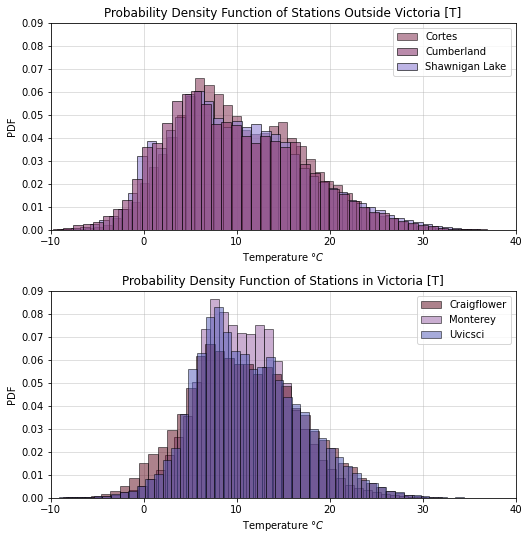

In [88]:
# plots histogram:


labels2=['Craigflower','Cortes','Cumberland','Monterey',
                'Shawnigan Lake','Uvicsci']

ff, (ax1,ax2)= plt.subplots(2,1)
ff.set_figwidth(8)
ff.set_figheight(8)
ff.tight_layout(pad=4.0)

binz = 50

ax2.hist(craigflower_mtp[0], binz, density=True, facecolor=colours2[0], alpha=0.5, edgecolor='k', zorder=10, label=labels2[0])
ax2.hist(monterey_mtp[0], binz, density=True, facecolor=colours2[3], alpha=0.5, edgecolor='k', zorder=4,label=labels2[3])
ax2.hist(uvicsci_mtp[0], binz, density=True, facecolor=colours2[5], alpha=0.5, edgecolor='k', zorder=11,label=labels2[5])


ax1.hist(cortes_mtp[0], binz, density=True, facecolor=colours2[1], alpha=0.5, edgecolor='k', zorder=4,label=labels2[1])
ax1.hist(cumberland_mtp[0], binz, density=True, facecolor=colours2[2], alpha=0.6, edgecolor='k', zorder=10,label=labels2[2])
ax1.hist(shawniganlake_mtp[0], binz, density=True, facecolor=colours2[4], alpha=0.6, edgecolor='k', zorder=6,label=labels2[4])


ax1.set_xlabel(r'Temperature $\degree C$')
ax1.set_ylabel('PDF')
ax1.set_title('Probability Density Function of Stations Outside Victoria [T]')
ax1.set_xlim(-10, 40)
ax1.set_ylim(0, 0.09)
ax1.grid(which='both', alpha=0.5)
ax1.legend()

ax2.set_xlabel(r'Temperature $\degree C$')
ax2.set_ylabel('PDF')
ax2.set_title('Probability Density Function of Stations in Victoria [T]')
ax2.set_xlim(-10, 40)
ax2.set_ylim(0, 0.09)
ax2.grid(which='both', alpha=0.5)
ax2.legend()



mean_cortes = np.mean(cortes_mtp[0])
mean_cumberland = np.mean(cumberland_mtp[0])
mean_shawniganlake = np.mean(shawniganlake_mtp[0])
mean_craigflower = np.mean(craigflower_mtp[0])
mean_monterey = np.mean(monterey_mtp[0])
mean_uvicsci = np.mean(uvicsci_mtp[0])


#ax1.axvline(mean_cumberland,0.1,0.9,ls='--',c=colours2[2])
#ax1.axvline(mean_cortes,0.1,0.9,ls='--',c=colours2[1])
#ax1.axvline(mean_shawniganlake,0.1,0.9,ls='--',c=colours2[4])

#ax2.axvline(mean_craigflower,0.1,0.9,ls='--',c=colours2[0])
#ax2.axvline(mean_monterey,0.1,0.9,ls='--',c=colours2[3])
#ax2.axvline(mean_uvicsci,0.1,0.9,ls='--',c=colours2[5])

plt.savefig(path + 'min_temp_PDF.png', format='png', dpi=300)

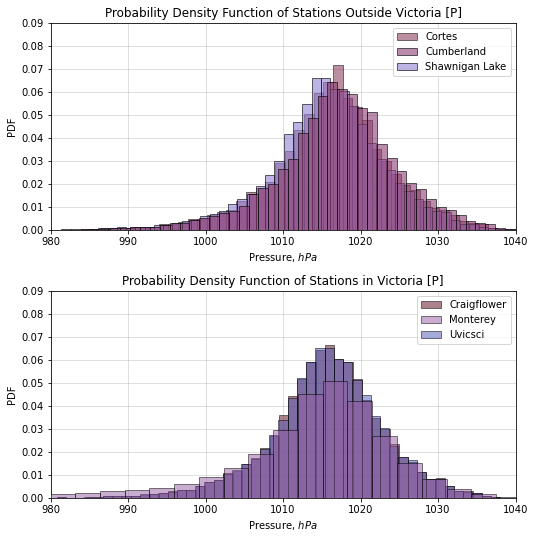

In [89]:
ff, (ax1,ax2)= plt.subplots(2,1)
ff.set_figwidth(8)
ff.set_figheight(8)
ff.tight_layout(pad=4.0)

binz = 50

ax2.hist(craigflower_mtp[1], binz, density=True, facecolor=colours2[0], alpha=0.5, edgecolor='k', zorder=10, label=labels2[0])
ax2.hist(monterey_mtp[1], binz, density=True, facecolor=colours2[3], alpha=0.5, edgecolor='k', zorder=40,label=labels2[3])
ax2.hist(uvicsci_mtp[1], binz, density=True, facecolor=colours2[5], alpha=0.5, edgecolor='k', zorder=11,label=labels2[5])


ax1.hist(cortes_mtp[1], binz, density=True, facecolor=colours2[1], alpha=0.5, edgecolor='k', zorder=4,label=labels2[1])
ax1.hist(cumberland_mtp[1], binz, density=True, facecolor=colours2[2], alpha=0.6, edgecolor='k', zorder=10,label=labels2[2])
ax1.hist(shawniganlake_mtp[1], binz, density=True, facecolor=colours2[4], alpha=0.6, edgecolor='k', zorder=6,label=labels2[4])


ax1.set_xlabel(r'Pressure, $hPa$')
ax1.set_ylabel('PDF')
ax1.set_title('Probability Density Function of Stations Outside Victoria [P]')
ax1.set_xlim(980, 1040)
ax1.set_ylim(0, 0.09)
ax1.grid(which='both', alpha=0.5)
ax1.legend()

ax2.set_xlabel(r'Pressure, $hPa$')
ax2.set_ylabel('PDF')
ax2.set_title('Probability Density Function of Stations in Victoria [P]')
ax2.set_xlim(980, 1040)
ax2.set_ylim(0, 0.09)
ax2.grid(which='both', alpha=0.5)
ax2.legend()

plt.savefig(path + 'min_pres_PDF.png', format='png', dpi=300)

In [44]:
# list of yearly means:



means_cortes = [np.mean(cortes_mtp[0][:len_year]), np.mean(cortes_mtp[0][len_year:2*len_year]),
                      np.mean(cortes_mtp[0][2*len_year:3*len_year]), np.mean(cortes_mtp[0][3*len_year:4*len_year]),
                       np.mean(cortes_mtp[0][4*len_year:5*len_year]), np.mean(cortes_mtp[0][5*len_year:6*len_year])]                                                       

means_cumberland = [np.mean(cumberland_mtp[0][:len_year]), np.mean(cumberland_mtp[0][len_year:2*len_year]),
                      np.mean(cumberland_mtp[0][2*len_year:3*len_year]), np.mean(cumberland_mtp[0][3*len_year:4*len_year]),
                       np.mean(cumberland_mtp[0][4*len_year:5*len_year]), np.mean(cumberland_mtp[0][5*len_year:6*len_year])]                                                       

means_shawniganlake = [np.mean(shawniganlake_mtp[0][:len_year]), np.mean(shawniganlake_mtp[0][len_year:2*len_year]),
                      np.mean(shawniganlake_mtp[0][2*len_year:3*len_year]), np.mean(shawniganlake_mtp[0][3*len_year:4*len_year]),
                       np.mean(shawniganlake_mtp[0][4*len_year:5*len_year]), np.mean(shawniganlake_mtp[0][5*len_year:6*len_year])]                                                       
                                 
means_craigflower = [np.mean(craigflower_mtp[0][:len_year]), np.mean(craigflower_mtp[0][len_year:2*len_year]),
                      np.mean(craigflower_mtp[0][2*len_year:3*len_year]), np.mean(craigflower_mtp[0][3*len_year:4*len_year]),
                       np.mean(craigflower_mtp[0][4*len_year:5*len_year]), np.mean(craigflower_mtp[0][5*len_year:6*len_year])]                                                       
                                                                     
means_monterey = [np.mean(monterey_mtp[0][:len_year]), np.mean(monterey_mtp[0][len_year:2*len_year]),
                      np.mean(monterey_mtp[0][2*len_year:3*len_year]), np.mean(monterey_mtp[0][3*len_year:4*len_year]),
                       np.mean(monterey_mtp[0][4*len_year:5*len_year]), np.mean(monterey_mtp[0][5*len_year:6*len_year])]                                                                     
                                                                     
means_uvicsci= [np.mean(uvicsci_mtp[0][:len_year]), np.mean(uvicsci_mtp[0][len_year:2*len_year]),
                      np.mean(uvicsci_mtp[0][2*len_year:3*len_year]), np.mean(uvicsci_mtp[0][3*len_year:4*len_year]),
                       np.mean(uvicsci_mtp[0][4*len_year:5*len_year]), np.mean(uvicsci_mtp[0][5*len_year:6*len_year])]



means_p_cortes = [np.mean(cortes_mtp[1][:len_year]), np.mean(cortes_mtp[1][len_year:2*len_year]),
                      np.mean(cortes_mtp[1][2*len_year:3*len_year]), np.mean(cortes_mtp[1][3*len_year:4*len_year]),
                       np.mean(cortes_mtp[1][4*len_year:5*len_year]), np.mean(cortes_mtp[1][5*len_year:6*len_year])]                                                       

means_p_cumberland = [np.mean(cumberland_mtp[1][:len_year]), np.mean(cumberland_mtp[1][len_year:2*len_year]),
                      np.mean(cumberland_mtp[1][2*len_year:3*len_year]), np.mean(cumberland_mtp[1][3*len_year:4*len_year]),
                       np.mean(cumberland_mtp[1][4*len_year:5*len_year]), np.mean(cumberland_mtp[1][5*len_year:6*len_year])]                                                       

means_p_shawniganlake = [np.mean(shawniganlake_mtp[1][:len_year]), np.mean(shawniganlake_mtp[1][len_year:2*len_year]),
                      np.mean(shawniganlake_mtp[1][2*len_year:3*len_year]), np.mean(shawniganlake_mtp[1][3*len_year:4*len_year]),
                       np.mean(shawniganlake_mtp[1][4*len_year:5*len_year]), np.mean(shawniganlake_mtp[1][5*len_year:6*len_year])]                                                       
                                 
means_p_craigflower = [np.mean(craigflower_mtp[1][:len_year]), np.mean(craigflower_mtp[1][len_year:2*len_year]),
                      np.mean(craigflower_mtp[1][2*len_year:3*len_year]), np.mean(craigflower_mtp[1][3*len_year:4*len_year]),
                       np.mean(craigflower_mtp[1][4*len_year:5*len_year]), np.mean(craigflower_mtp[1][5*len_year:6*len_year])]                                                       
                                                                     
means_p_monterey = [np.mean(monterey_mtp[1][:len_year]), np.mean(monterey_mtp[1][len_year:2*len_year]),
                      np.mean(monterey_mtp[1][2*len_year:3*len_year]), np.mean(monterey_mtp[1][3*len_year:4*len_year]),
                       np.mean(monterey_mtp[1][4*len_year:5*len_year]), np.mean(monterey_mtp[1][5*len_year:6*len_year])]                                                                     
                                                                     
means_p_uvicsci= [np.mean(uvicsci_mtp[1][:len_year]), np.mean(uvicsci_mtp[1][len_year:2*len_year]),
                      np.mean(uvicsci_mtp[1][2*len_year:3*len_year]), np.mean(uvicsci_mtp[1][3*len_year:4*len_year]),
                       np.mean(uvicsci_mtp[1][4*len_year:5*len_year]), np.mean(uvicsci_mtp[1][5*len_year:6*len_year])]






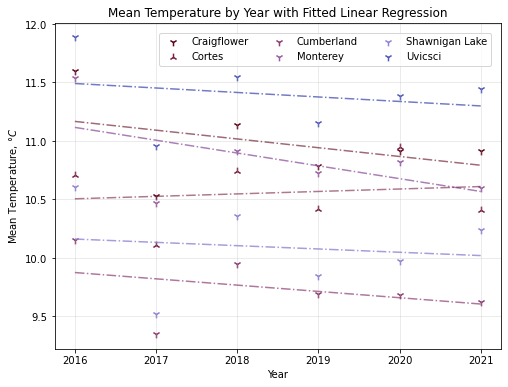

In [90]:
labels2=['Craigflower','Cortes','Cumberland','Monterey',
                'Shawnigan Lake','Uvicsci']

num_data = [1,2,3,4,5,6]

craigflower_mt_reg = sp.stats.linregress(num_data, means_craigflower)
monterey_mt_reg = sp.stats.linregress(num_data, means_monterey)
uvicsci_mt_reg = sp.stats.linregress(num_data, means_uvicsci)
cortes_mt_reg = sp.stats.linregress(num_data, means_cortes)
cumberland_mt_reg = sp.stats.linregress(num_data, means_cumberland)
shawniganlake_mt_reg = sp.stats.linregress(num_data, means_shawniganlake)


years = [2016, 2017, 2018, 2019, 2020,2021]

ff, (ax1)= plt.subplots(1,1)
ff.set_figwidth(8)
ff.set_figheight(6)

ax1.scatter(years, means_craigflower,s=60,marker='1', c=colours2[0], label=labels2[0])
ax1.scatter(years, means_cortes,c=colours2[1],s=60,marker='2', label=labels2[1])
ax1.scatter(years, means_cumberland,c=colours2[2],s=60,marker='1', label=labels2[2])
ax1.scatter(years, means_monterey,c=colours2[3],s=60,marker='1', label=labels2[3])
ax1.scatter(years, means_shawniganlake,c=colours2[4],s=60,marker='1', label=labels2[4])
ax1.scatter(years, means_uvicsci,c=colours2[5], s=60,marker='1',label=labels2[5])

ax1.plot(years, craigflower_mt_reg.slope * np.array(num_data) + craigflower_mt_reg.intercept, '-.',color=colours2[0],alpha=0.6 )
ax1.plot(years, monterey_mt_reg.slope * np.array(num_data) + monterey_mt_reg.intercept, '-.',color=colours2[3], alpha=0.8)
ax1.plot(years, uvicsci_mt_reg.slope * np.array(num_data) + uvicsci_mt_reg.intercept, '-.',color=colours2[5],alpha=0.8 )
ax1.plot(years, cortes_mt_reg.slope * np.array(num_data) + cortes_mt_reg.intercept, '-.',color=colours2[1],alpha=0.6 )
ax1.plot(years, cumberland_mt_reg.slope * np.array(num_data) + cumberland_mt_reg.intercept, '-.',color=colours2[2],alpha=0.7 )
ax1.plot(years, shawniganlake_mt_reg.slope * np.array(num_data) + shawniganlake_mt_reg.intercept, '-.',color=colours2[4], alpha=0.8)


ax1.set_title(r"Mean Temperature by Year with Fitted Linear Regression")
ax1.set_xlabel(r"Year")
ax1.set_ylabel(r"Mean Temperature, $\degree C$")
ax1.legend(loc='upper right', borderaxespad=1, ncol=3)
ax1.grid(alpha=0.3)

plt.savefig(path + 'min_temp_means_reg.png', format='png', dpi=300)

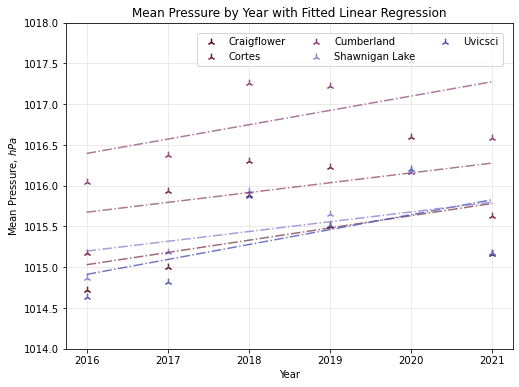

In [91]:
labels2=['Craigflower','Cortes','Cumberland','Monterey',
                'Shawnigan Lake','Uvicsci']

num_data = [1,2,3,4,5,6]

craigflower_mp_reg = sp.stats.linregress(num_data, means_p_craigflower)
monterey_mp_reg = sp.stats.linregress(num_data, means_p_monterey)
uvicsci_mp_reg = sp.stats.linregress(num_data, means_p_uvicsci)
cortes_mp_reg = sp.stats.linregress(num_data, means_p_cortes)
cumberland_mp_reg = sp.stats.linregress(num_data, means_p_cumberland)
shawniganlake_mp_reg = sp.stats.linregress(num_data, means_p_shawniganlake)


years = [2016, 2017, 2018, 2019, 2020,2021]

ff, (ax1)= plt.subplots(1,1)
ff.set_figwidth(8)
ff.set_figheight(6)

ax1.scatter(years, means_p_craigflower,s=60,marker='2', c=colours2[0], label=labels2[0])
ax1.scatter(years, means_p_cortes,c=colours2[1],s=60,marker='2', label=labels2[1])
ax1.scatter(years, means_p_cumberland,c=colours2[2],s=60,marker='2', label=labels2[2])
#ax1.scatter(years, means_p_monterey,c=colours2[3],s=60,marker='1', label=labels2[3])
ax1.scatter(years, means_p_shawniganlake,c=colours2[4],s=60,marker='2', label=labels2[4])
ax1.scatter(years, means_p_uvicsci,c=colours2[5], s=60,marker='2',label=labels2[5])

ax1.plot(years, craigflower_mp_reg.slope * np.array(num_data) + craigflower_mp_reg.intercept, '-.',color=colours2[0],alpha=0.6 )
#ax1.plot(years, monterey_mp_reg.slope * np.array(num_data) + monterey_mp_reg.intercept, '-.',color=colours2[3], alpha=0.8)
ax1.plot(years, uvicsci_mp_reg.slope * np.array(num_data) + uvicsci_mp_reg.intercept, '-.',color=colours2[5],alpha=0.8 )
ax1.plot(years, cortes_mp_reg.slope * np.array(num_data) + cortes_mp_reg.intercept, '-.',color=colours2[1],alpha=0.6 )
ax1.plot(years, cumberland_mp_reg.slope * np.array(num_data) + cumberland_mp_reg.intercept, '-.',color=colours2[2],alpha=0.7 )
ax1.plot(years, shawniganlake_mp_reg.slope * np.array(num_data) + shawniganlake_mp_reg.intercept, '-.',color=colours2[4], alpha=0.8)

ax1.set_ylim(1014,1018)
ax1.set_title(r"Mean Pressure by Year with Fitted Linear Regression")
ax1.set_xlabel(r"Year")
ax1.set_ylabel(r"Mean Pressure, $hPa$")
ax1.legend(loc='upper right', borderaxespad=1, ncol=3)
ax1.grid(alpha=0.3)

plt.savefig(path + 'min_pres_means_reg.png', format='png', dpi=300)


In [47]:
# list of yearly pressure std:



std_p_cortes = [np.var(cortes_mtp[1][:len_year]), np.var(cortes_mtp[1][len_year:2*len_year]),
                      np.var(cortes_mtp[1][2*len_year:3*len_year]), np.var(cortes_mtp[1][3*len_year:4*len_year]),
                       np.var(cortes_mtp[1][4*len_year:5*len_year]), np.var(cortes_mtp[1][5*len_year:6*len_year])]                                                       

std_p_cumberland = [np.var(cumberland_mtp[1][:len_year]), np.var(cumberland_mtp[1][len_year:2*len_year]),
                      np.var(cumberland_mtp[1][2*len_year:3*len_year]), np.var(cumberland_mtp[1][3*len_year:4*len_year]),
                       np.var(cumberland_mtp[1][4*len_year:5*len_year]), np.var(cumberland_mtp[1][5*len_year:6*len_year])]                                                       

std_p_shawniganlake = [np.var(shawniganlake_mtp[1][:len_year]), np.var(shawniganlake_mtp[1][len_year:2*len_year]),
                      np.var(shawniganlake_mtp[1][2*len_year:3*len_year]), np.var(shawniganlake_mtp[1][3*len_year:4*len_year]),
                       np.var(shawniganlake_mtp[1][4*len_year:5*len_year]), np.var(shawniganlake_mtp[1][5*len_year:6*len_year])]                                                       
                                 
std_p_craigflower = [np.var(craigflower_mtp[1][:len_year]), np.var(craigflower_mtp[1][len_year:2*len_year]),
                      np.var(craigflower_mtp[1][2*len_year:3*len_year]), np.var(craigflower_mtp[1][3*len_year:4*len_year]),
                       np.var(craigflower_mtp[1][4*len_year:5*len_year]), np.var(craigflower_mtp[1][5*len_year:6*len_year])]                                                       
                                                                     
std_p_monterey = [np.var(monterey_mtp[1][:len_year]), np.var(monterey_mtp[1][len_year:2*len_year]),
                      np.var(monterey_mtp[1][2*len_year:3*len_year]), np.var(monterey_mtp[1][3*len_year:4*len_year]),
                       np.var(monterey_mtp[1][4*len_year:5*len_year]), np.var(monterey_mtp[1][5*len_year:6*len_year])]                                                                     
                                                                     
std_p_uvicsci= [np.var(uvicsci_mtp[1][:len_year]), np.var(uvicsci_mtp[1][len_year:2*len_year]),
                      np.var(uvicsci_mtp[1][2*len_year:3*len_year]), np.var(uvicsci_mtp[1][3*len_year:4*len_year]),
                       np.var(uvicsci_mtp[1][4*len_year:5*len_year]), np.var(uvicsci_mtp[1][5*len_year:6*len_year])]


# temperatures:


std_t_cortes = [np.var(cortes_mtp[0][:len_year]), np.var(cortes_mtp[0][len_year:2*len_year]),
                      np.var(cortes_mtp[0][2*len_year:3*len_year]), np.var(cortes_mtp[0][3*len_year:4*len_year]),
                       np.var(cortes_mtp[0][4*len_year:5*len_year]), np.var(cortes_mtp[0][5*len_year:6*len_year])]                                                       

std_t_cumberland = [np.var(cumberland_mtp[0][:len_year]), np.var(cumberland_mtp[0][len_year:2*len_year]),
                      np.var(cumberland_mtp[0][2*len_year:3*len_year]), np.var(cumberland_mtp[0][3*len_year:4*len_year]),
                       np.var(cumberland_mtp[0][4*len_year:5*len_year]), np.var(cumberland_mtp[0][5*len_year:6*len_year])]                                                       

std_t_shawniganlake = [np.var(shawniganlake_mtp[0][:len_year]), np.var(shawniganlake_mtp[0][len_year:2*len_year]),
                      np.var(shawniganlake_mtp[0][2*len_year:3*len_year]), np.var(shawniganlake_mtp[0][3*len_year:4*len_year]),
                       np.var(shawniganlake_mtp[0][4*len_year:5*len_year]), np.var(shawniganlake_mtp[0][5*len_year:6*len_year])]                                                       
                                 
std_t_craigflower = [np.var(craigflower_mtp[0][:len_year]), np.var(craigflower_mtp[0][len_year:2*len_year]),
                      np.var(craigflower_mtp[0][2*len_year:3*len_year]), np.var(craigflower_mtp[0][3*len_year:4*len_year]),
                       np.var(craigflower_mtp[0][4*len_year:5*len_year]), np.var(craigflower_mtp[0][5*len_year:6*len_year])]                                                       
                                                                     
std_t_monterey = [np.var(monterey_mtp[0][:len_year]), np.var(monterey_mtp[0][len_year:2*len_year]),
                      np.var(monterey_mtp[0][2*len_year:3*len_year]), np.var(monterey_mtp[0][3*len_year:4*len_year]),
                       np.var(monterey_mtp[0][4*len_year:5*len_year]), np.var(monterey_mtp[0][5*len_year:6*len_year])]                                                                     
                                                                     
std_t_uvicsci= [np.var(uvicsci_mtp[0][:len_year]), np.var(uvicsci_mtp[0][len_year:2*len_year]),
                      np.var(uvicsci_mtp[0][2*len_year:3*len_year]), np.var(uvicsci_mtp[0][3*len_year:4*len_year]),
                       np.var(uvicsci_mtp[0][4*len_year:5*len_year]), np.var(uvicsci_mtp[0][5*len_year:6*len_year])]




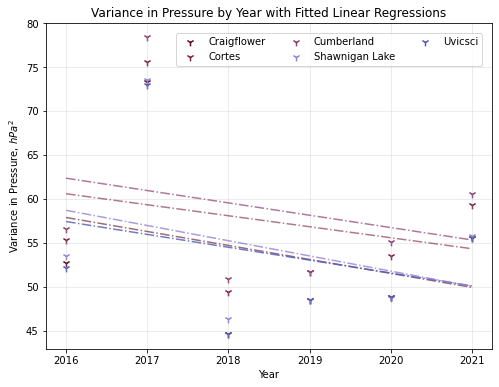

In [92]:
labels2=['Craigflower','Cortes','Cumberland','Monterey',
                'Shawnigan Lake','Uvicsci']

num_data = [1,2,3,4,5,6]

craigflower_sp_reg = sp.stats.linregress(num_data, std_p_craigflower)
monterey_sp_reg = sp.stats.linregress(num_data, std_p_monterey)
uvicsci_sp_reg = sp.stats.linregress(num_data, std_p_uvicsci)
cortes_sp_reg = sp.stats.linregress(num_data, std_p_cortes)
cumberland_sp_reg = sp.stats.linregress(num_data, std_p_cumberland)
shawniganlake_sp_reg = sp.stats.linregress(num_data, std_p_shawniganlake)


years = [2016, 2017, 2018, 2019, 2020,2021]

ff, (ax1)= plt.subplots(1,1)
ff.set_figwidth(8)
ff.set_figheight(6)

ax1.scatter(years, std_p_craigflower,s=60,marker='1', c=colours2[0], label=labels2[0])
ax1.scatter(years, std_p_cortes,c=colours2[1],s=60,marker='1', label=labels2[1])
ax1.scatter(years, std_p_cumberland,c=colours2[2],s=60,marker='1', label=labels2[2])
#ax1.scatter(years, std_monterey,c=colours2[3],s=60,marker='1', label=labels2[3])
ax1.scatter(years, std_p_shawniganlake,c=colours2[4],s=60,marker='1', label=labels2[4])
ax1.scatter(years, std_p_uvicsci,c=colours2[5], s=60,marker='1',label=labels2[5])

ax1.plot(years, craigflower_sp_reg.slope * np.array(num_data) + craigflower_sp_reg.intercept, '-.',color=colours2[0],alpha=0.6 )
#ax1.plot(years, monterey_sp_reg.slope * np.array(num_data) + monterey_sp_reg.intercept, '-.',color=colours2[3], alpha=0.8)
ax1.plot(years, uvicsci_sp_reg.slope * np.array(num_data) + uvicsci_sp_reg.intercept, '-.',color=colours2[5],alpha=0.8 )
ax1.plot(years, cortes_sp_reg.slope * np.array(num_data) + cortes_sp_reg.intercept, '-.',color=colours2[1],alpha=0.6 )
ax1.plot(years, cumberland_sp_reg.slope * np.array(num_data) + cumberland_sp_reg.intercept, '-.',color=colours2[2],alpha=0.7 )
ax1.plot(years, shawniganlake_sp_reg.slope * np.array(num_data) + shawniganlake_sp_reg.intercept, '-.',color=colours2[4], alpha=0.8)


ax1.set_title(r"Variance in Pressure by Year with Fitted Linear Regressions")
ax1.set_xlabel(r"Year")
ax1.set_ylabel(r"Variance in Pressure, $hPa^2$")
ax1.legend(loc='upper right', borderaxespad=1, ncol=3)
ax1.grid(alpha=0.3)

plt.savefig(path + 'min_pres_std_reg.png', format='png', dpi=300)

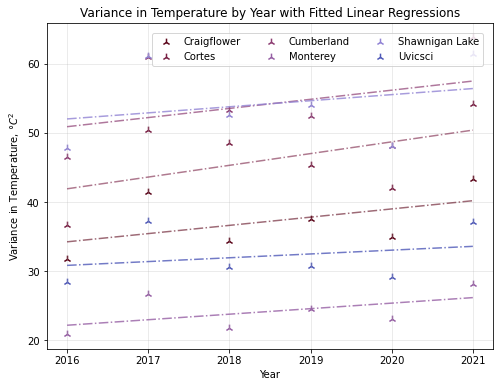

In [93]:
labels2=['Craigflower','Cortes','Cumberland','Monterey',
                'Shawnigan Lake','Uvicsci']

num_data = [1,2,3,4,5,6]

craigflower_st_reg = sp.stats.linregress(num_data, std_t_craigflower)
monterey_st_reg = sp.stats.linregress(num_data, std_t_monterey)
uvicsci_st_reg = sp.stats.linregress(num_data, std_t_uvicsci)
cortes_st_reg = sp.stats.linregress(num_data, std_t_cortes)
cumberland_st_reg = sp.stats.linregress(num_data, std_t_cumberland)
shawniganlake_st_reg = sp.stats.linregress(num_data, std_t_shawniganlake)


years = [2016, 2017, 2018, 2019, 2020,2021]

ff, (ax1)= plt.subplots(1,1)
ff.set_figwidth(8)
ff.set_figheight(6)

ax1.scatter(years, std_t_craigflower,s=60,marker='2', c=colours2[0], label=labels2[0])
ax1.scatter(years, std_t_cortes,c=colours2[1],s=60,marker='2', label=labels2[1])
ax1.scatter(years, std_t_cumberland,c=colours2[2],s=60,marker='2', label=labels2[2])
ax1.scatter(years, std_t_monterey,c=colours2[3],s=60,marker='2', label=labels2[3])
ax1.scatter(years, std_t_shawniganlake,c=colours2[4],s=60,marker='2', label=labels2[4])
ax1.scatter(years, std_t_uvicsci,c=colours2[5], s=60,marker='2',label=labels2[5])

ax1.plot(years, craigflower_st_reg.slope * np.array(num_data) + craigflower_st_reg.intercept, '-.',color=colours2[0],alpha=0.6 )
ax1.plot(years, monterey_st_reg.slope * np.array(num_data) + monterey_st_reg.intercept, '-.',color=colours2[3], alpha=0.8)
ax1.plot(years, uvicsci_st_reg.slope * np.array(num_data) + uvicsci_st_reg.intercept, '-.',color=colours2[5],alpha=0.8 )
ax1.plot(years, cortes_st_reg.slope * np.array(num_data) + cortes_st_reg.intercept, '-.',color=colours2[1],alpha=0.6 )
ax1.plot(years, cumberland_st_reg.slope * np.array(num_data) + cumberland_st_reg.intercept, '-.',color=colours2[2],alpha=0.7 )
ax1.plot(years, shawniganlake_st_reg.slope * np.array(num_data) + shawniganlake_st_reg.intercept, '-.',color=colours2[4], alpha=0.8)


ax1.set_title(r"Variance in Temperature by Year with Fitted Linear Regressions")
ax1.set_xlabel(r"Year")
ax1.set_ylabel(r"Variance in Temperature, $\degree C^2$")
ax1.legend(loc='upper right', borderaxespad=1, ncol=3)
ax1.grid(alpha=0.3)

plt.savefig(path + 'min_temp_std_reg.png', format='png', dpi=300)

In [50]:
labels2=['Craigflower','Cortes','Cumberland','Monterey',
                'Shawnigan Lake','Uvicsci']

# auto and cross correlation functions for signal in 2016:

craig_auto = signal.correlate(craigflower_mtp[0][:len_year],craigflower_mtp[0][:len_year])
craig_lags = signal.correlation_lags(len(craigflower_mtp[0][:len_year]),len(craigflower_mtp[0][:len_year]))

craig_cortes =  signal.correlate(craigflower_mtp[0][:len_year],cortes_mtp[0][:len_year])
craig_cumber =  signal.correlate(craigflower_mtp[0][:len_year],cumberland_mtp[0][:len_year])
craig_mont =  signal.correlate(craigflower_mtp[0][:len_year],monterey_mtp[0][:len_year])
craig_shawn =  signal.correlate(craigflower_mtp[0][:len_year],shawniganlake_mtp[0][:len_year])
craig_uvic =  signal.correlate(craigflower_mtp[0][:len_year],uvicsci_mtp[0][:len_year])

cortes_auto = signal.correlate(cortes_mtp[0][:len_year],cortes_mtp[0][:len_year])
cortes_lags = signal.correlation_lags(len(cortes_mtp[0][:len_year]),len(cortes_mtp[0][:len_year]))

cortes_craig =  signal.correlate(cortes_mtp[0][:len_year],cortes_mtp[0][:len_year])
cortes_cumber =  signal.correlate(cortes_mtp[0][:len_year],cumberland_mtp[0][:len_year])
cortes_mont =  signal.correlate(cortes_mtp[0][:len_year],monterey_mtp[0][:len_year])
cortes_shawn =  signal.correlate(cortes_mtp[0][:len_year],shawniganlake_mtp[0][:len_year])
cortes_uvic =  signal.correlate(cortes_mtp[0][:len_year],uvicsci_mtp[0][:len_year])


cumber_auto = signal.correlate(cumberland_mtp[0][:len_year],cumberland_mtp[0][:len_year])
cumber_lags = signal.correlation_lags(len(cortes_mtp[0][:len_year]),len(cortes_mtp[0][:len_year]))

cumber_craig =  signal.correlate(cumberland_mtp[0][:len_year],craigflower_mtp[0][:len_year])
cumber_cortes =  signal.correlate(cumberland_mtp[0][:len_year],cortes_mtp[0][:len_year])
cumber_mont =  signal.correlate(cumberland_mtp[0][:len_year],monterey_mtp[0][:len_year])
cumber_shawn =  signal.correlate(cumberland_mtp[0][:len_year],shawniganlake_mtp[0][:len_year])
cumber_uvic =  signal.correlate(cumberland_mtp[0][:len_year],uvicsci_mtp[0][:len_year])

uvic_auto = signal.correlate(uvicsci_mtp[1][:len_year],uvicsci_mtp[0][:len_year])
uvic_lags = signal.correlation_lags(len(cortes_mtp[1][:len_year]),len(cortes_mtp[0][:len_year]))

uvic_craig =  signal.correlate(uvicsci_mtp[0][:len_year],craigflower_mtp[0][:len_year])
uvic_cortes =  signal.correlate(uvicsci_mtp[0][:len_year],cortes_mtp[0][:len_year])
uvic_mont =  signal.correlate(uvicsci_mtp[0][:len_year],monterey_mtp[0][:len_year])
uvic_cumber =  signal.correlate(uvicsci_mtp[0][:len_year],cumberland_mtp[0][:len_year])
uvic_shawn =  signal.correlate(uvicsci_mtp[0][:len_year],shawniganlake_mtp[0][:len_year])

uvic_auto_all = signal.correlate(uvicsci_mtp[0],uvicsci_mtp[0])
uvic_lags_all = signal.correlation_lags(len(cortes_mtp[1]),len(cortes_mtp[0]))

uvic_craig_all =  signal.correlate(uvicsci_mtp[0],craigflower_mtp[0])
uvic_cortes_all =  signal.correlate(uvicsci_mtp[0],cortes_mtp[0])
uvic_mont_all =  signal.correlate(uvicsci_mtp[0],monterey_mtp[0])
uvic_cumber_all =  signal.correlate(uvicsci_mtp[0],cumberland_mtp[0])
uvic_shawn_all =  signal.correlate(uvicsci_mtp[0],shawniganlake_mtp[0])



cortes_auto_all = signal.correlate(cortes_mtp[0],cortes_mtp[0])
cortes_lags_all = signal.correlation_lags(len(cortes_mtp[0]),len(cortes_mtp[0]))

cortes_craig_all =  signal.correlate(cortes_mtp[0],cortes_mtp[0])
cortes_cumber_all =  signal.correlate(cortes_mtp[0],cumberland_mtp[0])
cortes_mont_all =  signal.correlate(cortes_mtp[0],monterey_mtp[0])
cortes_shawn_all =  signal.correlate(cortes_mtp[0],shawniganlake_mtp[0])
cortes_uvic_all =  signal.correlate(cortes_mtp[0],uvicsci_mtp[0])



cumber_auto_all = signal.correlate(cumberland_mtp[0],cumberland_mtp[0])
cumber_lags_all = signal.correlation_lags(len(cortes_mtp[0]),len(cortes_mtp[0]))

cumber_craig_all =  signal.correlate(cumberland_mtp[0],craigflower_mtp[0])
cumber_cortes_all =  signal.correlate(cumberland_mtp[0],cortes_mtp[0])
cumber_mont_all =  signal.correlate(cumberland_mtp[0],monterey_mtp[0])
cumber_shawn_all =  signal.correlate(cumberland_mtp[0],shawniganlake_mtp[0])
cumber_uvic_all =  signal.correlate(cumberland_mtp[0],uvicsci_mtp[0])

In [51]:
print(len(uvic_auto_all)/2)

3461759.5


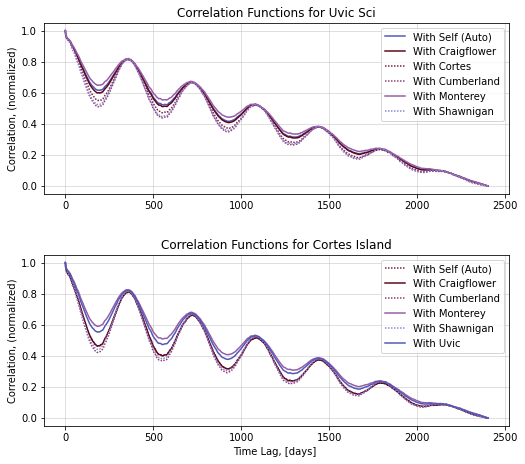

In [94]:
width=8
height=7
ff, (ax1,ax3) = plt.subplots(2,1)
ff.set_figwidth(width)
ff.set_figheight(height)
ff.tight_layout(pad=4.0)


start=3461759



ax1.plot(uvic_lags_all[3461759::1440]/(60*24), uvic_auto_all[3461759::1440]/max(uvic_auto_all), color=colours2[5], label="With Self (Auto)") 
ax1.plot(uvic_lags_all[3461759::1440]/(60*24), uvic_craig_all[3461759::1440]/max(uvic_craig_all),color=colours2[0], label="With Craigflower") 
ax1.plot(uvic_lags_all[3461759::1440]/(60*24), uvic_cortes_all[3461759::1440]/max(uvic_cortes_all),linestyle=(0,(1,1.)),color=colours2[1], label="With Cortes") 
ax1.plot(uvic_lags_all[3461759::1440]/(60*24), uvic_cumber_all[3461759::1440]/max(uvic_cumber_all),linestyle=(0,(1,1.)),color=colours2[2], label="With Cumberland") 
ax1.plot(uvic_lags_all[3461759::1440]/(60*24), uvic_mont_all[3461759::1440]/max(uvic_mont_all),color=colours2[3], label="With Monterey") 
ax1.plot(uvic_lags_all[3461759::1440]/(60*24), uvic_shawn_all[3461759::1440]/max(uvic_shawn_all),linestyle=(0,(1,1.)),color=colours2[4],label="With Shawnigan") 

ax2.plot(cumber_lags_all[start::1440]/(60*24), cumber_auto_all[start::1440]/max(cumber_auto_all), color=colours2[2], label="With Self (Auto)") 
ax2.plot(cumber_lags_all[start::1440]/(60*24), cumber_craig_all[start::1440]/max(cumber_craig_all),color=colours2[0], label="With Craigflower") 
ax2.plot(cumber_lags_all[start::1440]/(60*24), cumber_cortes_all[start::1440]/max(cumber_cortes_all),linestyle=(0,(5,1.6)),color=colours2[1], label="With Cortes") 
ax2.plot(cumber_lags_all[start::1440]/(60*24), cumber_mont_all[start::1440]/max(cumber_mont_all),linestyle=(0,(5,1.5)),color=colours2[3], label="With Monterey") 
ax2.plot(cumber_lags_all[start::1440]/(60*24), cumber_shawn_all[start::1440]/max(cumber_shawn_all),color=colours2[4], label="With Shawnigan") 
ax2.plot(cumber_lags_all[start::1440]/(60*24), cumber_uvic_all[start::1440]/max(cumber_uvic_all),color=colours2[5],label="With Uvic") 

ax3.plot(cortes_lags_all[start::1440]/(60*24), cortes_auto_all[start::1440]/max(cortes_auto_all),linestyle=(0,(1,1.)), color=colours2[1], label="With Self (Auto)") 
ax3.plot(cortes_lags_all[start::1440]/(60*24), cortes_craig_all[start::1440]/max(cortes_craig_all),color=colours2[0], label="With Craigflower") 
ax3.plot(cortes_lags_all[start::1440]/(60*24), cortes_cumber_all[start::1440]/max(cortes_cumber_all),linestyle=(0,(1,1.)),color=colours2[2], label="With Cumberland") 
ax3.plot(cortes_lags_all[start::1440]/(60*24), cortes_mont_all[start::1440]/max(cortes_mont_all),color=colours2[3], label="With Monterey") 
ax3.plot(cortes_lags_all[start::1440]/(60*24), cortes_shawn_all[start::1440]/max(cortes_shawn_all),linestyle=(0,(1,1.)),color=colours2[4], label="With Shawnigan") 
ax3.plot(cortes_lags_all[start::1440]/(60*24), cortes_uvic_all[start::1440]/max(cortes_uvic_all),color=colours2[5],label="With Uvic") 

#ax1.set_xscale('log', base=1)
#ax1.set_yscale('log', base=2)

ax1.set_title("Correlation Functions for Uvic Sci")
ax1.set_ylabel(r"Correlation, (normalized)")
#ax1.set_xlabel("Time Lag, [days] ")
ax1.legend()
ax1.grid(True, alpha=0.5)

ax2.set_title("Correlation Functions for Cumberland")
ax2.set_ylabel(r"Correlation, (normalized)")
ax2.set_xlabel("Time Lag, [days] ")
ax2.legend()
ax2.grid(True, alpha=0.5)

ax3.set_title("Correlation Functions for Cortes Island")
ax3.set_ylabel(r"Correlation, (normalized)")
ax3.set_xlabel("Time Lag, [days] ")
ax3.legend()
ax3.grid(True, alpha=0.5)

plt.savefig(path + 'min_temp_correlation_funcs.png', format='png', dpi=300)


In [53]:
labels2=['Craigflower','Cortes','Cumberland','Monterey',
                'Shawnigan Lake','Uvicsci']


# calculates the PSD for the temperature data in 2016:

nfft = 2**15 # length of points in each window  
nfft2 = 2**16
window = "hann"  # python argument for hanning window
overlap = nfft / 2 # will give an overlap of 50% of the windows points
overlap2 = nfft2/2
fsamp = 24*60 # samples per day

# power spectra:

craigflower_freqs16, craigflower_pxx16 = signal.welch(craigflower_mtp[0][:len_year], fs=fsamp, window=window, nperseg=nfft, noverlap=overlap)
cortes_freqs16, cortes_pxx16 = signal.welch(cortes_mtp[0][:len_year], fs=fsamp, window=window, nperseg=nfft, noverlap=overlap)
cumberland_freqs16, cumberland_pxx16 = signal.welch(cumberland_mtp[0][:len_year], fs=fsamp, window=window, nperseg=nfft, noverlap=overlap)
monterey_freqs16, monterey_pxx16 = signal.welch(monterey_mtp[0][:len_year], fs=fsamp, window=window, nperseg=nfft, noverlap=overlap)
shawniganlake_freqs16, shawniganlake_pxx16 = signal.welch(shawniganlake_mtp[0][:len_year], fs=fsamp, window=window, nperseg=nfft, noverlap=overlap)
uvicsci_freqs16, uvicsci_pxx16 = signal.welch(uvicsci_mtp[0][:len_year], fs=fsamp, window=window, nperseg=nfft, noverlap=overlap)

craigflower_freqs, craigflower_pxx = signal.welch(craigflower_mtp[0], fs=fsamp, window=window, nperseg=nfft, noverlap=overlap)
cortes_freqs, cortes_pxx = signal.welch(cortes_mtp[0], fs=fsamp, window=window, nperseg=nfft, noverlap=overlap)
cumberland_freqs, cumberland_pxx = signal.welch(cumberland_mtp[0], fs=fsamp, window=window, nperseg=nfft, noverlap=overlap)
monterey_freqs, monterey_pxx = signal.welch(monterey_mtp[0], fs=fsamp, window=window, nperseg=nfft, noverlap=overlap)
shawniganlake_freqs, shawniganlake_pxx = signal.welch(shawniganlake_mtp[0], fs=fsamp, window=window, nperseg=nfft, noverlap=overlap)
uvicsci_freqs, uvicsci_pxx = signal.welch(uvicsci_mtp[0], fs=fsamp, window=window, nperseg=nfft, noverlap=overlap)

craigflower_freqs_p, craigflower_pxx_p = signal.welch(craigflower_mtp[1], fs=fsamp, window=window, nperseg=nfft2, noverlap=overlap2)
cortes_freqs_p, cortes_pxx_p = signal.welch(cortes_mtp[1], fs=fsamp, window=window, nperseg=nfft2, noverlap=overlap2)
cumberland_freqs_p, cumberland_pxx_p = signal.welch(cumberland_mtp[1], fs=fsamp, window=window, nperseg=nfft2, noverlap=overlap2)
monterey_freqs_p, monterey_pxx_p = signal.welch(monterey_mtp[1], fs=fsamp, window=window, nperseg=nfft2, noverlap=overlap2)
shawniganlake_freqs_p, shawniganlake_pxx_p = signal.welch(shawniganlake_mtp[1], fs=fsamp, window=window, nperseg=nfft2, noverlap=overlap2)
uvicsci_freqs_p, uvicsci_pxx_p = signal.welch(uvicsci_mtp[1], fs=fsamp, window=window, nperseg=nfft2, noverlap=overlap2)



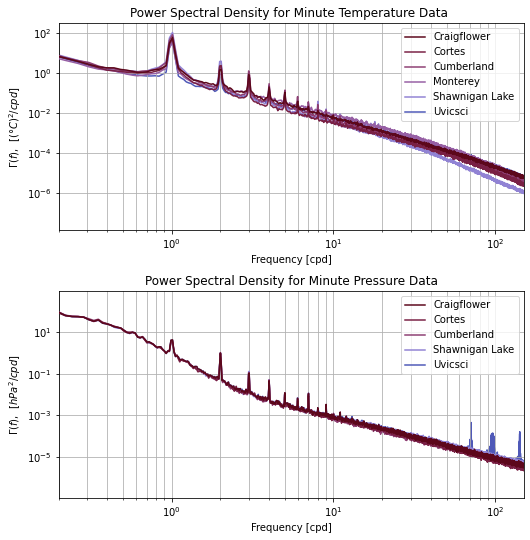

In [95]:
width=8
height=8
ff, (ax1,ax2) = plt.subplots(2,1)
ff.set_figwidth(width)
ff.set_figheight(height)
ff.tight_layout(pad=4.0)


ax1.loglog(craigflower_freqs, craigflower_pxx, color=colours2[0], label=labels2[0],zorder=10)
ax1.loglog(cortes_freqs, cortes_pxx, color=colours2[1], label=labels2[1],zorder=8)
ax1.loglog(cumberland_freqs, cumberland_pxx, color=colours2[2], label=labels2[2],zorder=6)
ax1.loglog(monterey_freqs, monterey_pxx, color=colours2[3], label=labels2[3],zorder=4)
ax1.loglog(shawniganlake_freqs, shawniganlake_pxx, color=colours2[4], label=labels2[4],zorder=2)
ax1.loglog(uvicsci_freqs, uvicsci_pxx, color=colours2[5], label=labels2[5],zorder=0)


ax2.loglog(craigflower_freqs_p, craigflower_pxx_p, color=colours2[0], label=labels2[0],zorder=10)
ax2.loglog(cortes_freqs_p, cortes_pxx_p, color=colours2[1], label=labels2[1],zorder=8)
ax2.loglog(cumberland_freqs_p, cumberland_pxx_p, color=colours2[2], label=labels2[2],zorder=6)
#ax2.loglog(monterey_freqs_p, monterey_pxx_p, color=colours2[3], label=labels2[3],zorder=4)
ax2.loglog(shawniganlake_freqs_p, shawniganlake_pxx_p, color=colours2[4], label=labels2[4],zorder=2)
ax2.loglog(uvicsci_freqs_p, uvicsci_pxx_p, color=colours2[5], label=labels2[5],zorder=0)






ax1.set_title("Power Spectral Density for Minute Temperature Data ")
ax1.set_ylabel(r"$\Gamma(f)$,  $ [(\degree C)^2/cpd]$")
ax1.set_xlabel("Frequency [cpd]")
ax1.legend()
ax1.grid(True, which='both')
ax1.set_xlim(0.2,150)

ax2.set_title("Power Spectral Density for Minute Pressure Data")
ax2.set_ylabel(r"$\Gamma(f)$,  $ [hPa^2/cpd]$")
ax2.set_xlabel("Frequency [cpd]")
ax2.legend()
ax2.set_xlim(0.2,150)
ax2.grid(True, which='both')

plt.savefig(path + 'min_power_spectra.png', format='png', dpi=300)

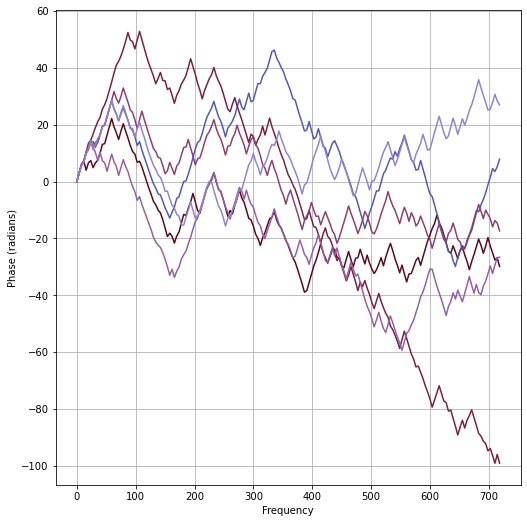

In [55]:
width=8
height=8
ff, (ax1) = plt.subplots(1,1)
ff.set_figwidth(width)
ff.set_figheight(height)
ff.tight_layout(pad=4.0)


#ax1.set_xscale('log', base=10)
#ax1.set_yscale('log', base=10)

ax1.phase_spectrum(craigflower_mtp[0][:len_year:1440],Fs=24*60,color=colours2[0])
ax1.phase_spectrum(uvicsci_mtp[0][:len_year:1440],Fs=24*60,color=colours2[5])
ax1.phase_spectrum(cortes_mtp[0][:len_year:1440],Fs=24*60,color=colours2[1])
ax1.phase_spectrum(cumberland_mtp[0][:len_year:1440],Fs=24*60,color=colours2[2])
ax1.phase_spectrum(monterey_mtp[0][:len_year:1440],Fs=24*60,color=colours2[3])
ax1.phase_spectrum(shawniganlake_mtp[0][:len_year:1440],Fs=24*60,color=colours2[4])
ax1.grid()
#ax1.set_xlim(0,100)
#ax1.set_ylim(-500,500)
plt.show()

In [56]:
# periodogram

#fs = 24*60

#f, Pxx_den = signal.periodogram(monterey_mtp[1], fs,nfft=2**5,scaling="spectrum",detrend='linear')






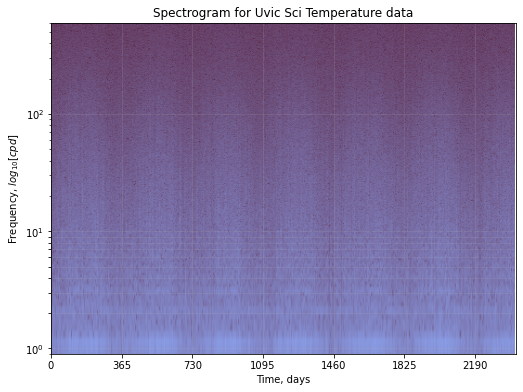

In [96]:
from matplotlib.colors import ListedColormap

# making colourmap:

N=256; vals=np.ones((N,4))
vals[:,0] = np.linspace(80/256, 145/256, N)
vals[:,1] = np.linspace(4/256, 175/256, N)
vals[:,2] = np.linspace(20/256, 255/256, N)
newcmp = ListedColormap(vals)


#from matplotlib.colors import DivergingNorm

width=8
height=6
ff, (ax1) = plt.subplots(1,1)
ff.set_figwidth(width)
ff.set_figheight(height)
ff.tight_layout(pad=4.0)

cmap=plt.get_cmap('seismic')
spec,frek,t,im=ax1.specgram(uvicsci_mtp[0],Fs=60*24,NFFT=2**13,mode='default',cmap=newcmp)#, norm=DivergingNorm(0))


#ax1.set_xscale('log', base=10)
ax1.set_yscale('log', base=10)
ax1.set_xticks([0,365,365*2,365*3,365*4,365*5,365*6])
ax1.set_yticks([1,2,3,4,5,6,7,8,9,10,100],alpha=0.5)

ax1.set_ylim(0.9,600)
ax1.set_title("Spectrogram for Uvic Sci Temperature data")
ax1.set_ylabel(r"Frequency, $log_{10}[cpd]$")
ax1.set_xlabel("Time, days")
ax1.grid(True, alpha=0.2)

plt.savefig(path + 'min_temp_periodogram.png', format='png', dpi=300)

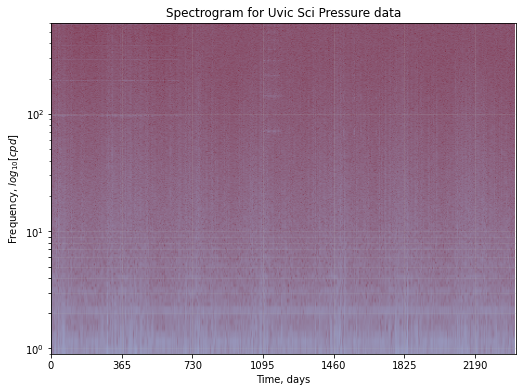

In [97]:
N=256; vals=np.ones((N,4))
vals[:,0] = np.linspace(120/256, 165/256, N)
vals[:,1] = np.linspace(4/256, 210/256, N)
vals[:,2] = np.linspace(20/256, 255/256, N)
newcmp = ListedColormap(vals)

width=8
height=6
ff, (ax1) = plt.subplots(1,1)
ff.set_figwidth(width)
ff.set_figheight(height)
ff.tight_layout(pad=4.0)

cmap=plt.get_cmap('seismic')
spec,frek,t,im=ax1.specgram(uvicsci_mtp[1],Fs=60*24,NFFT=2**13,mode='default',cmap=newcmp)#, norm=DivergingNorm(0))


#ax1.set_xscale('log', base=10)
ax1.set_yscale('log', base=10)
ax1.set_xticks([0,365,365*2,365*3,365*4,365*5,365*6])
ax1.set_yticks([1,2,3,4,5,6,7,8,9,10,100],alpha=0.5)

ax1.set_ylim(0.9,600)
ax1.set_title("Spectrogram for Uvic Sci Pressure data")
ax1.set_ylabel(r"Frequency, $log_{10}[cpd]$")
ax1.set_xlabel("Time, days")
ax1.grid(True, alpha=0.2)

plt.savefig(path + 'min_pres_periodogram.png', format='png', dpi=300)

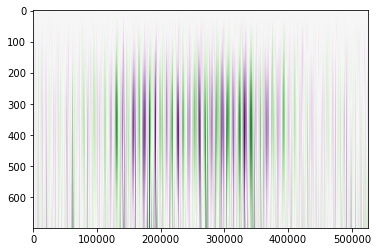

In [216]:
widths = np.arange(1, )
cwtmatr = signal.cwt(uvicsci_mtp[0][:len_year], signal.ricker, widths)
plt.imshow(cwtmatr , cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

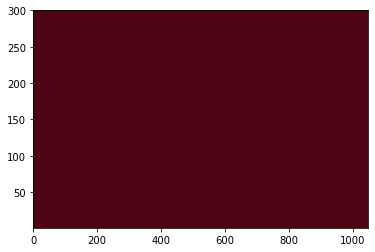

In [242]:
import pywt

scale_max=300

scales = np.arange(1, scale_max)  # No. of scales
coef, freqs = pywt.cwt(uvicsci_mtp[1][0:len_year], scales, 'morl')  # Finding CWT using gaussian wavelet

#plt.figure(figsize=(15, 10))
plt.imshow(abs(coef), extent=[0, len(uvicsci_mtp[0][:1048]), scale_max, 1], interpolation='bilinear', cmap=newcmp,
           aspect='auto', vmax=abs(coef).max(), vmin=abs(coef).min())
plt.gca().invert_yaxis()
#plt.yticks(np.arange(1, 31, 1))
#plt.xticks(np.arange(0, 201, 10))
plt.show()

In [ ]:
# phase diagram
# more elevation
# latitude
# variance associated with dominated EOFs
# filtering

